# Задание 10

Решить задачу Коши для одномерного уравнения диффузии по схеме Кранка-Николсон
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}, \; 0<x<L, \; L=1 $$

$$u(0, t) = 0, \; u(L, t) = 0, \; u(x,0) = x(1 - x/L)^2$$
На каждом шаге по времени найти максимальное значение температуры и нарисовать зависимость максимальной температуры от времени. Показать, что на больших временах она убывает экспоненциально.

## Метод Кранка - Николсона

$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$

Перепишем уравнение, заменив операцию дифференцироавния конечными разностями:

$$\frac{v_j^{n+1} - v_j^n}{\tau} = \frac{v_{j+1}^n - 2v_j^n +v_{j-1}^n}{2h^2} + \frac{v_{j+1}^{n+1} - 2v_j^{n+1} +v_{j-1}^{n+1}}{2h^2}$$

Сгруппируем:

$$\frac{\tau(v_{j+1}^{n+1} +(-2 - \frac{2h^2}{\tau})v_j^{n+1} +v_{j-1}^{n+1})}{2h^2} = \frac{-\tau(v_{j+1}^n + (-2 + \frac{2h^2}{\tau})v_j^n +v_{j-1}^n)}{2h^2}$$

Тогда можем переписать уравнение в следующем виде:

$$ a_jv_{j+1}^{n+1} + b_jv_j^{n+1} + c_jv_{j-1}^{n+1} = d_j $$

Где:
$$ a_j = \left\{\begin{matrix}
0, & j = 1\\ 
-\frac{\tau}{2h^2}, & j = 2, ..., N-1;
\end{matrix}\right. $$
$$b_j = 1 + \frac{\tau}{h^2};$$
$$ c_j = \left\{\begin{matrix}
-\frac{\tau}{2h^2}, & j = 1, ..., N-2\\ 
0, & j = N-1;
\end{matrix}\right.\ $$
$$d_j = \frac{\tau(v_{j+1}^n + (-2 + \frac{2h^2}{\tau})v_j^n +v_{j-1}^n)}{2h^2}$$

In [1]:
from math import sin, pi
import numpy as np
import matplotlib.pyplot as plt

### Алгоритм прогонки тридиагональной матрицы

In [2]:
def TDMA(a, b, c, d, N):
    for i in range(0, N-1):
        w = a[i]/b[i-1]
        b[i] = b[i] - w*c[i-1]
        d[i] = d[i] - w*d[i-1]
    y = np.zeros(N-1)
    y[N-2] = d[N-2] / b[N-2]
    for i in range(N-3, -1, -1):
        y[i] = 1 / b[i] * (d[i] - c[i] * y[i+1])
    return y

### Начальные параметры

In [3]:
N = 200
x1 = 0
x2 = 1
h = (x2-x1)/N
T=200
t1 = 0
t2 = 0.1
tau = (t2-t1)/T

### Подготовка

In [4]:
def u0(x):
    return x * (1-x)**2

In [5]:
u = []
def init():
    u_0 = []
    for i in range(0, N+1):
        u_0.append(u0(x1 + i*h))
    u.append(u_0)

In [6]:
def Lu(j, m):
    return (u[m][j+1] - 2*u[m][j] + u[m][j-1]) / h**2

### Решение

In [7]:
init()

for m in range(0, T):
    a = np.full(N-1, -0.5*tau/h**2)
    a[0] = 0
    b = np.full(N-1, 1 + tau/h**2)
    c = np.full(N-1, -0.5*tau/h**2)
    c[N-2] = 0
    d=[]
    for j in range(1, N):
        d.append(u[m][j] + tau / 2 * Lu(j, m))
    layer = []
    layer = TDMA(a, b, c, d, N)
    layer = np.insert(layer,0, 0)
    layer = np.append(layer, 0)
    u.append(layer)

## Визуализация

In [8]:
u_max = []
t = []
for i in range(len(u)):
    u_max.append(max(u[i]))
    t.append(t1+tau*i)

Text(0, 0.5, 'Максимальная температура')

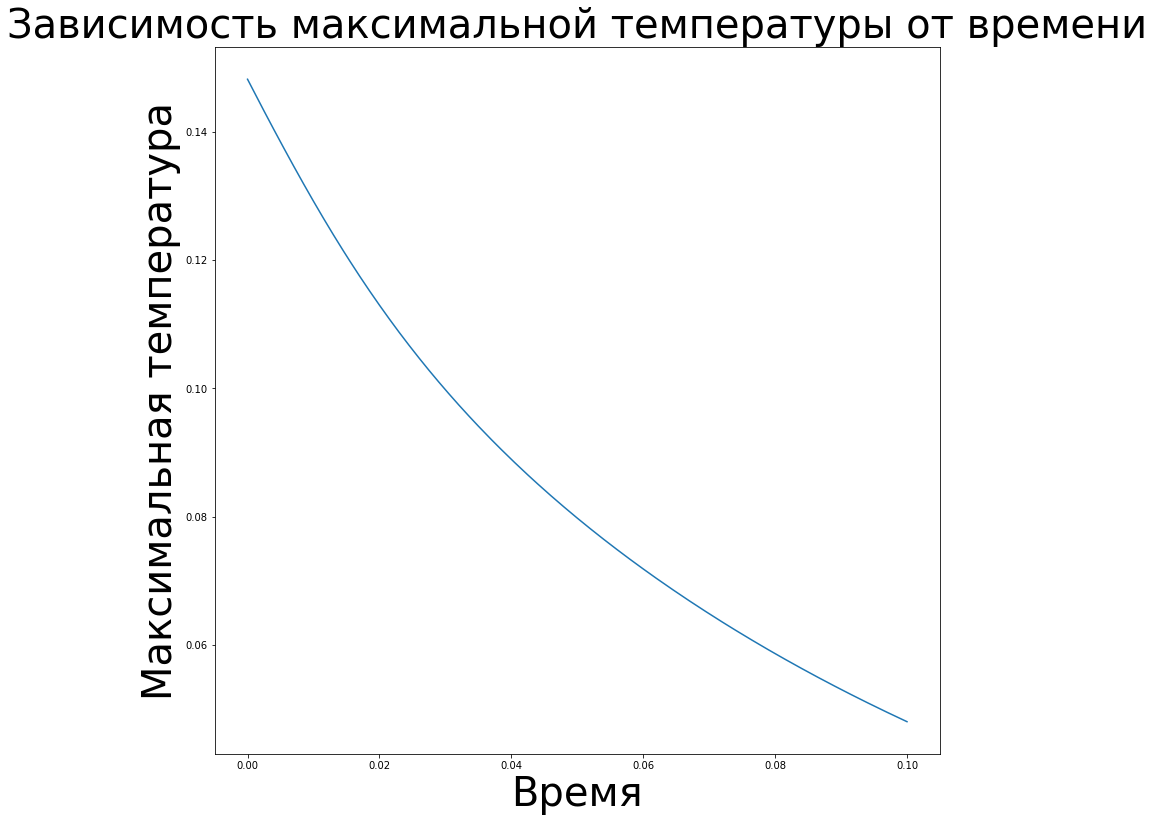

In [9]:
plt.figure(figsize=(13, 13))
plt.plot(t, u_max)
plt.title('Зависимость максимальной температуры от времени', fontsize=40)
plt.xlabel('Время', fontsize=40)
plt.ylabel('Максимальная температура', fontsize=40)

In [10]:
import seaborn as sns
import matplotlib.pylab as plt

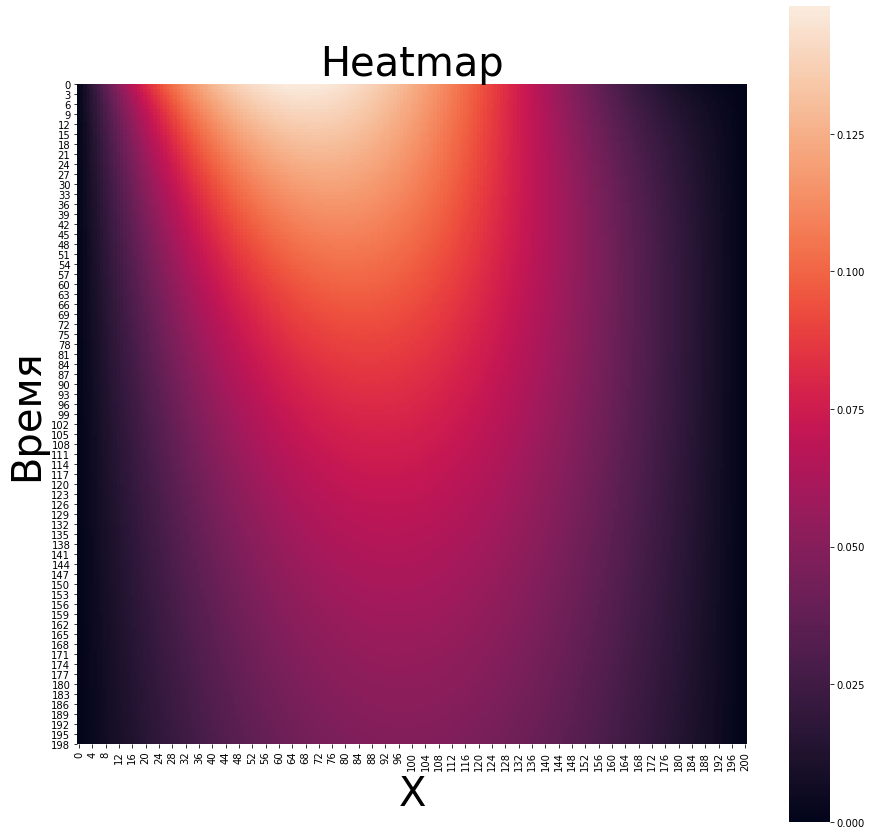

In [11]:
plt.figure(figsize=(15, 15))
maxi = max(u_max)
ax = sns.heatmap(u, vmax=maxi, square=True  )
ax.set_ylabel('Время', fontsize=40)
ax.set_xlabel('X', fontsize=40)
ax.set_title('Heatmap', fontsize=40)
plt.show()

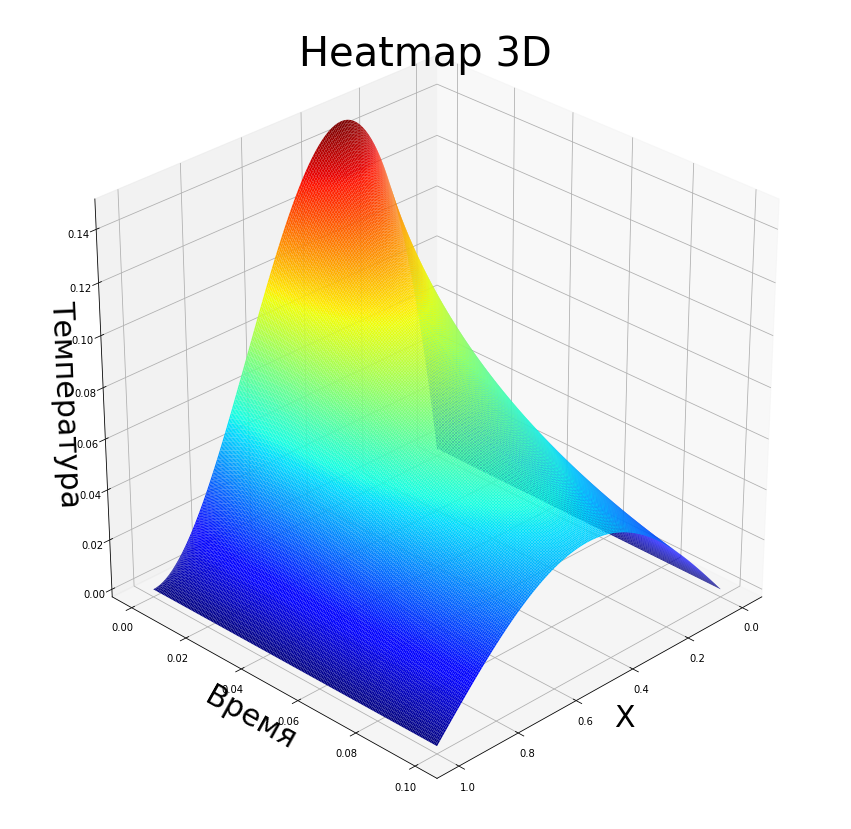

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(15, 15))
y=np.linspace(t1,t2, T+1)
x=np.linspace(x1,x2, N+1)
x = np.array(x)
y = np.array(y)
u = np.array(u)
X, Y = np.meshgrid(x, y)

jet = plt.get_cmap('jet')
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, u, rstride = 1, cstride = 1, cmap = jet, linewidth = 0)

ax.set_ylabel('Время', fontsize=30)
ax.set_xlabel('X', fontsize=30)
ax.set_zlabel('Температура', fontsize=30)
ax.set_title('Heatmap 3D', fontsize=40)
ax.view_init(30, 45)
plt.show()
